# Тестовое задание в Topfase

В этом файле представлены данные по работе рекламных кампаний, запущенных пятью медиабайерами для привлечения пользователей в наше приложение. 

Цель исследования: Дать рекомендации медиабайерам для увеличения прибыли с приложения.

Ход исследования:
1. Загрузим данные и подготовим их к анализу;
2. Посчитаем маркетинговые метрики.
3. Вывод.

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
import plotly.io as pio
pio.renderers.default = "svg"
svg_renderer = pio.renderers["svg"]
svg_renderer.scale = 1.2

## 1. Загрузим данные и подготовим их к анализу

In [3]:
data = pd.read_csv('C:\\StudentYandex\\Sobes4_Stajirovka\\test_data.csv')

Посмотрим на данные

In [4]:
data.head()

,Campaign_id,Geo,Buyer,Impressions,Clicks,Installs,Registrations,Spend,Revenue_ad1d,Revenue_in_app1d,Payers1d,Revenue_ad7d,Revenue_in_app7d,Payers7d,Revenue_ad30d,Revenue_in_app30d,Payers30d
0,1,north america,buyer_1,3456974,129508,33054,21932,"3208,440002","1163,521408","162,220001",64,"1381,310062","199,749999",79,"1527,013835","276,629998",83
1,2,north america,buyer_2,245542,6306,3401,2448,"1569,519999","833,059639","37,25",17,"1200,964697","69,340001",19,"1449,001828","120,250001",22
2,3,north america,buyer_1,1281103,35724,13315,8101,"1231,999998","459,6826","3,26",4,"524,987826","24,7",6,"572,633765","24,7",6
3,4,north america,buyer_1,215538,9987,3119,1857,"1228,129999","602,77816","26,13",11,"830,113889","33,439999",12,"1042,831595","57,530002",12
4,5,western europe,buyer_2,335878,7343,3952,2955,"872,570005","427,807238","19,030001",4,"577,039081","20,640001",5,"714,554179","32,150001",6


Взглянем на общую информацию таблицы, а так же на количество пропусков в данных

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Campaign_id        87 non-null     int64 
 1   Geo                87 non-null     object
 2   Buyer              87 non-null     object
 3   Impressions        87 non-null     int64 
 4   Clicks             87 non-null     int64 
 5   Installs           87 non-null     int64 
 6   Registrations      87 non-null     int64 
 7   Spend              87 non-null     object
 8   Revenue_ad1d       87 non-null     object
 9   Revenue_in_app1d   87 non-null     object
 10  Payers1d           87 non-null     int64 
 11  Revenue_ad7d       87 non-null     object
 12  Revenue_in_app7d   87 non-null     object
 13  Payers7d           87 non-null     int64 
 14  Revenue_ad30d      87 non-null     object
 15  Revenue_in_app30d  87 non-null     object
 16  Payers30d          87 non-null     int64 
dtyp

Проверим на наличие явных дубликатов

In [6]:
data.duplicated().sum()

0

Поменяем типы данных в столбцах типа object, где ожидалось float

In [7]:
# создадим функцию для преобразования т.к. это надо будет сделать с 7 столбцами
def floting(column):
    data[column]=data[column].map(lambda x: float(x.replace(',','.')))

In [8]:
floting('Spend')
floting('Revenue_ad1d')
floting('Revenue_in_app1d')
floting('Revenue_ad7d')
floting('Revenue_in_app7d')
floting('Revenue_ad30d')
floting('Revenue_in_app30d')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Campaign_id        87 non-null     int64  
 1   Geo                87 non-null     object 
 2   Buyer              87 non-null     object 
 3   Impressions        87 non-null     int64  
 4   Clicks             87 non-null     int64  
 5   Installs           87 non-null     int64  
 6   Registrations      87 non-null     int64  
 7   Spend              87 non-null     float64
 8   Revenue_ad1d       87 non-null     float64
 9   Revenue_in_app1d   87 non-null     float64
 10  Payers1d           87 non-null     int64  
 11  Revenue_ad7d       87 non-null     float64
 12  Revenue_in_app7d   87 non-null     float64
 13  Payers7d           87 non-null     int64  
 14  Revenue_ad30d      87 non-null     float64
 15  Revenue_in_app30d  87 non-null     float64
 16  Payers30d          87 non-nu

**Вывод:**
* Пропуски и дубликаты отсутствуют;
* В файле 87 строк с данными;
* Поменяли тип данных в столбцах где это было необходимо;

**Описание данных:**
* Campaign_id - ID кампании;
* Geo - геопозиция, на которую настроена рекламная кампания;
* Buyer - байер, выполнивший запуск;
* Impressions - количество показов рекламных объявлений;
* Clicks - количество кликов; 
* Installs - количество установок;
* Registrations - количество регистраций;
* Spend - Затраченная сумма;
* Revenue_ad (1d/7d/30d) - Выручка с рекламы от пользователей, зарегистрировавшихся в приложении, на 1/7/30 день их жизни
* Revenue_in_app (1d/7d/30d) - Выручка с покупок от пользователей, зарегистрировавшихся в приложении, на 1/7/30 день их жизни
* Payers (1d/7d/30d) - Количество покупателей в приложении на 1/7/30 день их жизни.

## 2. Посчитаем маркетинговые метрики

Для начала посмотрим, получила ли компания прибыль с данных рекламных компаний на 1, 7 и 30 дни жизни пользователей.

In [10]:
print('Прибыль на 1 день жизни пользователя',round((data['Revenue_ad1d'].sum() + data['Revenue_in_app1d'].sum())- data['Spend'].sum(),2),'у.е.')
print('Прибыль на 7 день жизни пользователя',round((data['Revenue_ad7d'].sum() + data['Revenue_in_app7d'].sum())- data['Spend'].sum(),2),'у.е.')
print('Прибыль на 30 день жизни пользователя',round((data['Revenue_ad30d'].sum() + data['Revenue_in_app30d'].sum())- data['Spend'].sum(),2),'у.е.')

Прибыль на 1 день жизни пользователя -10088.71 у.е.
Прибыль на 7 день жизни пользователя -7225.48 у.е.
Прибыль на 30 день жизни пользователя -4563.37 у.е.


* Компания осталась в убытке даже на 30 день жизни пользователей, попробуем разобраться, где теряются клиенты, и почему компанию ушла в минус.

Построим нашу маркетинговую воронку:

In [11]:
funnel_v=data[['Impressions','Clicks','Installs','Registrations']].T
funnel_v['users'] = funnel_v.sum(axis=1)
funnel_v[['users']]

,users
Impressions,9922978
Clicks,330991
Installs,105431
Registrations,66908


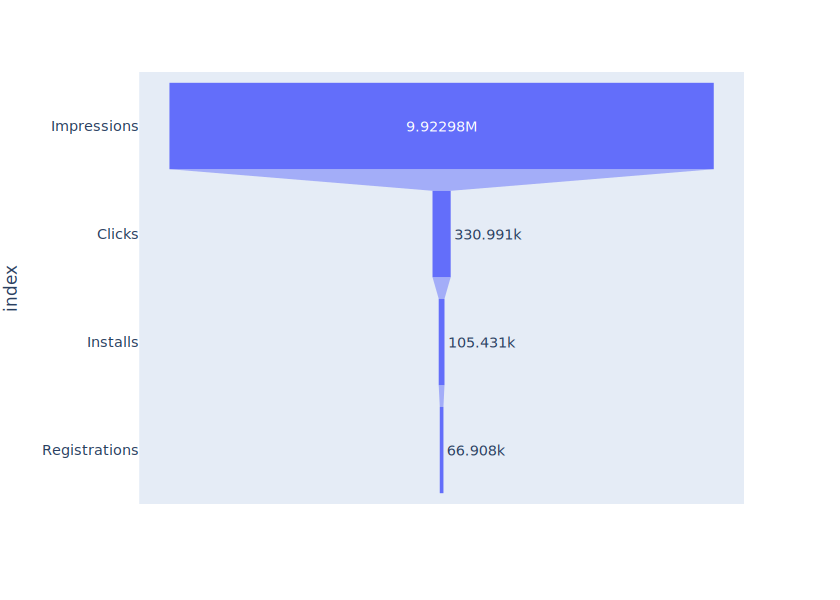

In [12]:
fig = px.funnel(funnel_v, x='users', y=funnel_v.index)
fig.show()

Как и предполагалось, сначала клиент просматривает рекламму, потом кликает на неё, затем устанавливает приложение и регистрируется. Следовательно целевое действие клиента это регистрация. Как видим по воронке более 90% клиентов не "кликают на рекламу". 

Посмотрим на коэффициент конверсии для каждого региона относительно показов и кликов.

In [13]:
pivot_ctr = data.pivot_table(index='Geo', values=['Impressions','Clicks'], aggfunc='sum').reset_index()\
.sort_values(['Geo'])
pivot_ctr['CTR'] = round((pivot_ctr['Clicks']/pivot_ctr['Impressions'])*100,2)
pivot_ctr

,Geo,Clicks,Impressions,CTR
0,australia oceania,53,2185,2.43
1,cis,19846,729586,2.72
2,latin america,17728,522450,3.39
3,north africa,32124,948653,3.39
4,north america,240776,6801913,3.54
5,tropical africa,2735,90894,3.01
6,western europe,17729,827297,2.14


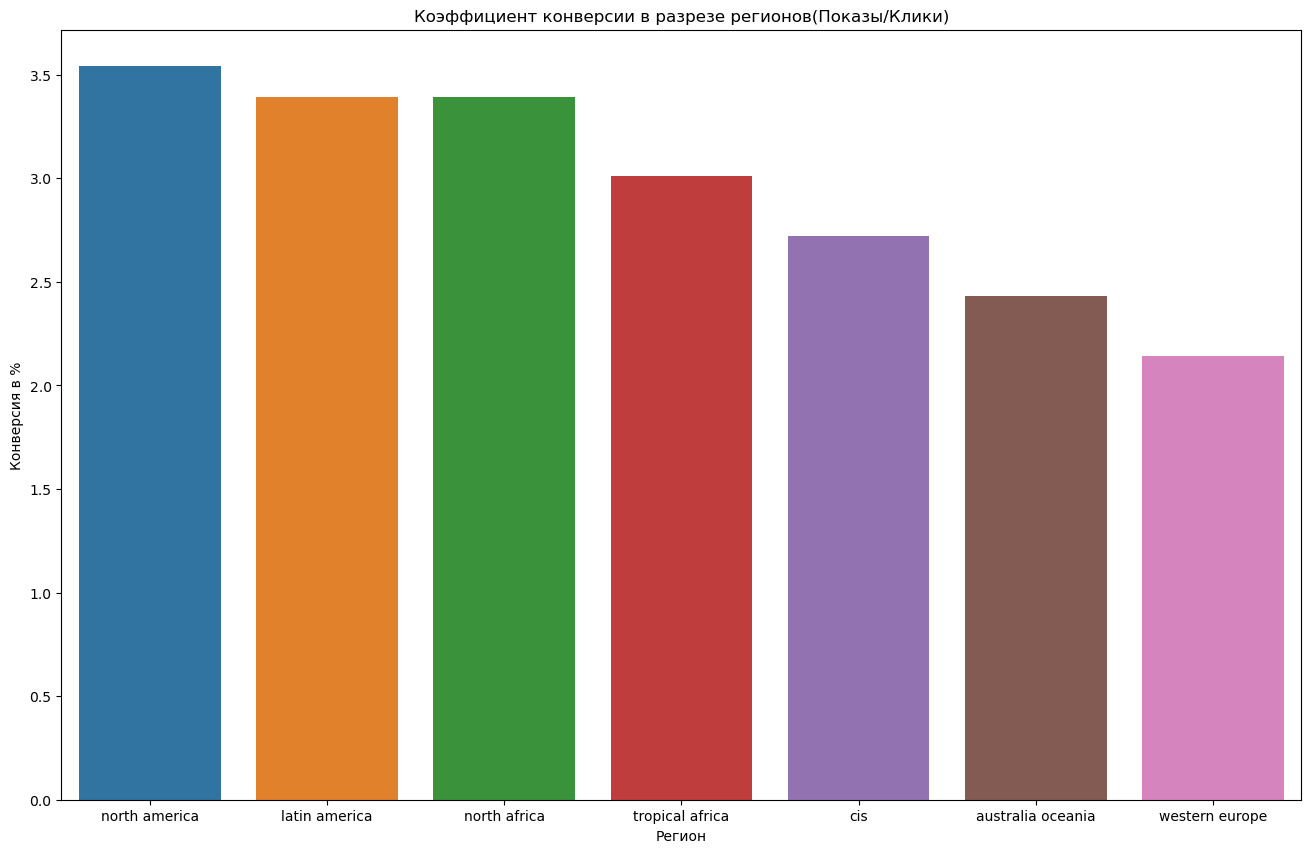

In [14]:
plt.figure(figsize=(16, 10))
sns.barplot(x='Geo',y='CTR', data=pivot_ctr.sort_values('CTR', ascending = False))
plt.xlabel('Регион')
plt.ylabel('Конверсия в %')
plt.title('Коэффициент конверсии в разрезе регионов(Показы/Клики)')
plt.show()

* Лучшая конверсия(Показы/Клики) в регионе `north america` - 3.54%, а в `western europe` самая низкая - 2.14%.

Посмотрим на коэффициент конверсии для каждого региона относительно кликов и установок.

In [15]:
pivot_cr_1 = data.pivot_table(index='Geo', values=['Clicks','Installs'], aggfunc='sum').reset_index()\
.sort_values(['Geo'])
pivot_cr_1['CR'] = round((pivot_cr_1['Installs']/pivot_cr_1['Clicks'])*100,2)
pivot_cr_1

,Geo,Clicks,Installs,CR
0,australia oceania,53,10,18.87
1,cis,19846,7833,39.47
2,latin america,17728,5836,32.92
3,north africa,32124,9660,30.07
4,north america,240776,72861,30.26
5,tropical africa,2735,778,28.45
6,western europe,17729,8453,47.68


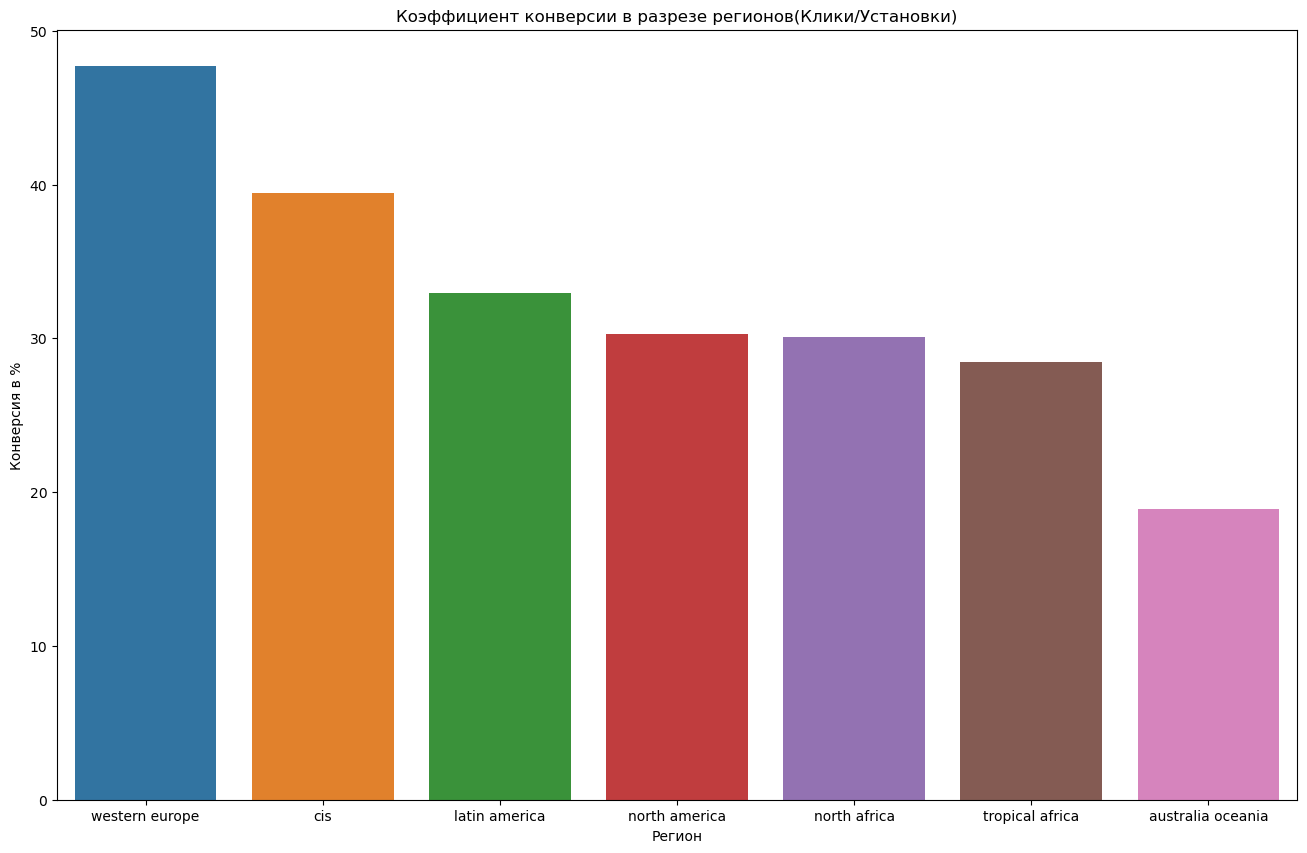

In [16]:
plt.figure(figsize=(16, 10))
sns.barplot(x='Geo',y='CR', data=pivot_cr_1.sort_values('CR', ascending = False))
plt.xlabel('Регион')
plt.ylabel('Конверсия в %')
plt.title('Коэффициент конверсии в разрезе регионов(Клики/Установки)')
plt.show()

* Лучшая конверсия(Клики/Установки) в регионе `western europe` - 47.68%, а в `australia oceania` самая низкая - 18.87%. Так же стоит отметить что регион с наибольшей конверсией Показы/Клики - `north america`, здесь занимает лишь 4 позицию 30.26%.

Посмотрим на коэффициент конверсии для каждого региона относительно установок и регистраций.

In [17]:
pivot_cr_2 = data.pivot_table(index='Geo', values=['Installs','Registrations'], aggfunc='sum').reset_index()\
.sort_values(['Geo'])
pivot_cr_2['CR'] = round((pivot_cr_2['Registrations']/pivot_cr_2['Installs'])*100,2)
pivot_cr_2

,Geo,Installs,Registrations,CR
0,australia oceania,10,9,90.00
1,cis,7833,4069,51.95
2,latin america,5836,3507,60.09
3,north africa,9660,7069,73.18
4,north america,72861,46175,63.37
5,tropical africa,778,485,62.34
6,western europe,8453,5594,66.18


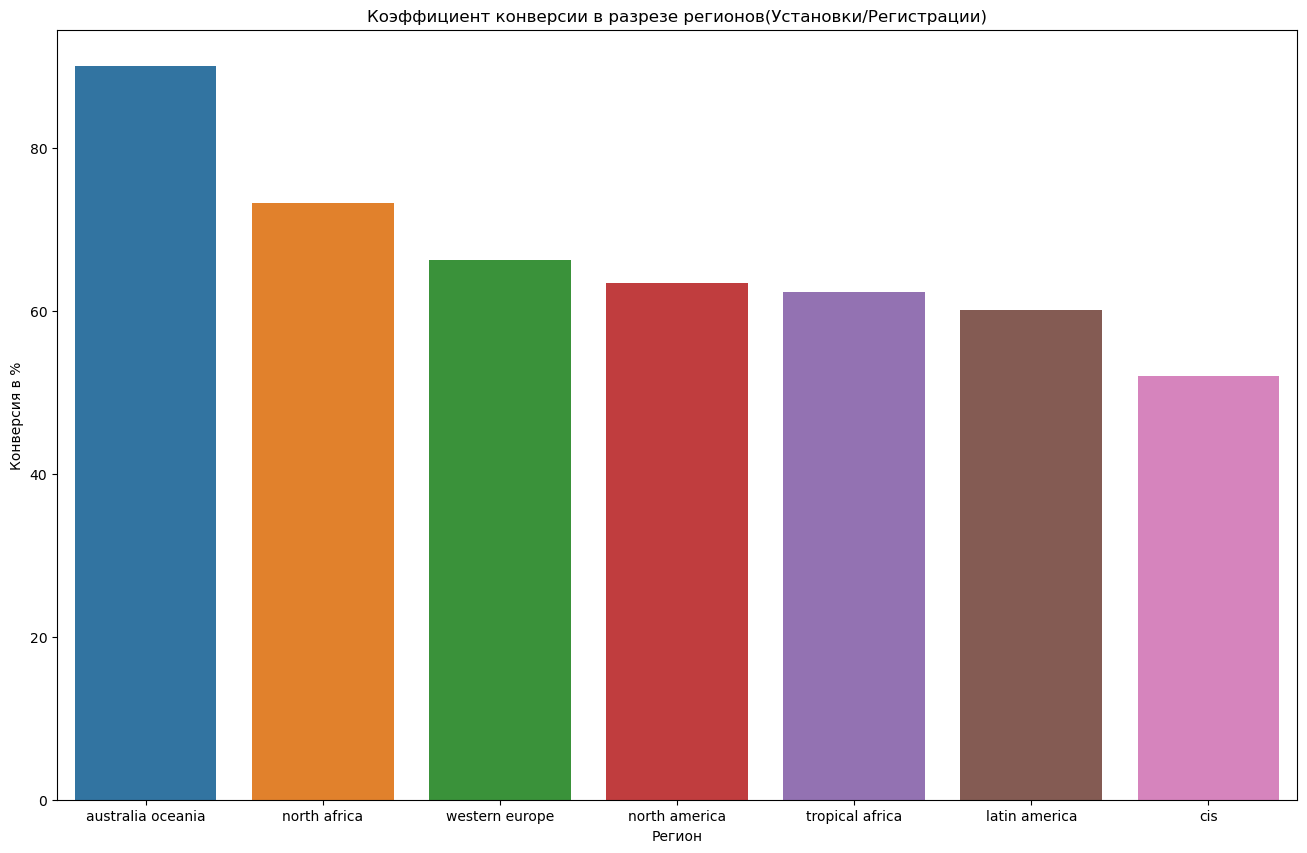

In [18]:
plt.figure(figsize=(16, 10))
sns.barplot(x='Geo',y='CR', data=pivot_cr_2.sort_values('CR', ascending = False))
plt.xlabel('Регион')
plt.ylabel('Конверсия в %')
plt.title('Коэффициент конверсии в разрезе регионов(Установки/Регистрации)')
plt.show()

* Лучшая конверсия(Установки/Регистрации) в регионе australia oceania - 90%, а в CIS самая низкая - 51.95%.

Видим что "лидеры по конверссии" постоянно меняются, будем высчитывать конверсию CR как Клики/Целевое действие(Регистрация). Посчитаем:

In [19]:
pivot_fin = data.pivot_table(index='Geo', values=['Clicks','Registrations'], aggfunc='sum').reset_index()\
.sort_values(['Geo'])
pivot_fin['CR'] = round((pivot_fin['Registrations']/pivot_fin['Clicks'])*100,2)
pivot_fin

,Geo,Clicks,Registrations,CR
0,australia oceania,53,9,16.98
1,cis,19846,4069,20.50
2,latin america,17728,3507,19.78
3,north africa,32124,7069,22.01
4,north america,240776,46175,19.18
5,tropical africa,2735,485,17.73
6,western europe,17729,5594,31.55


In [20]:
round(pivot_fin['CR'].mean(),2)

21.1

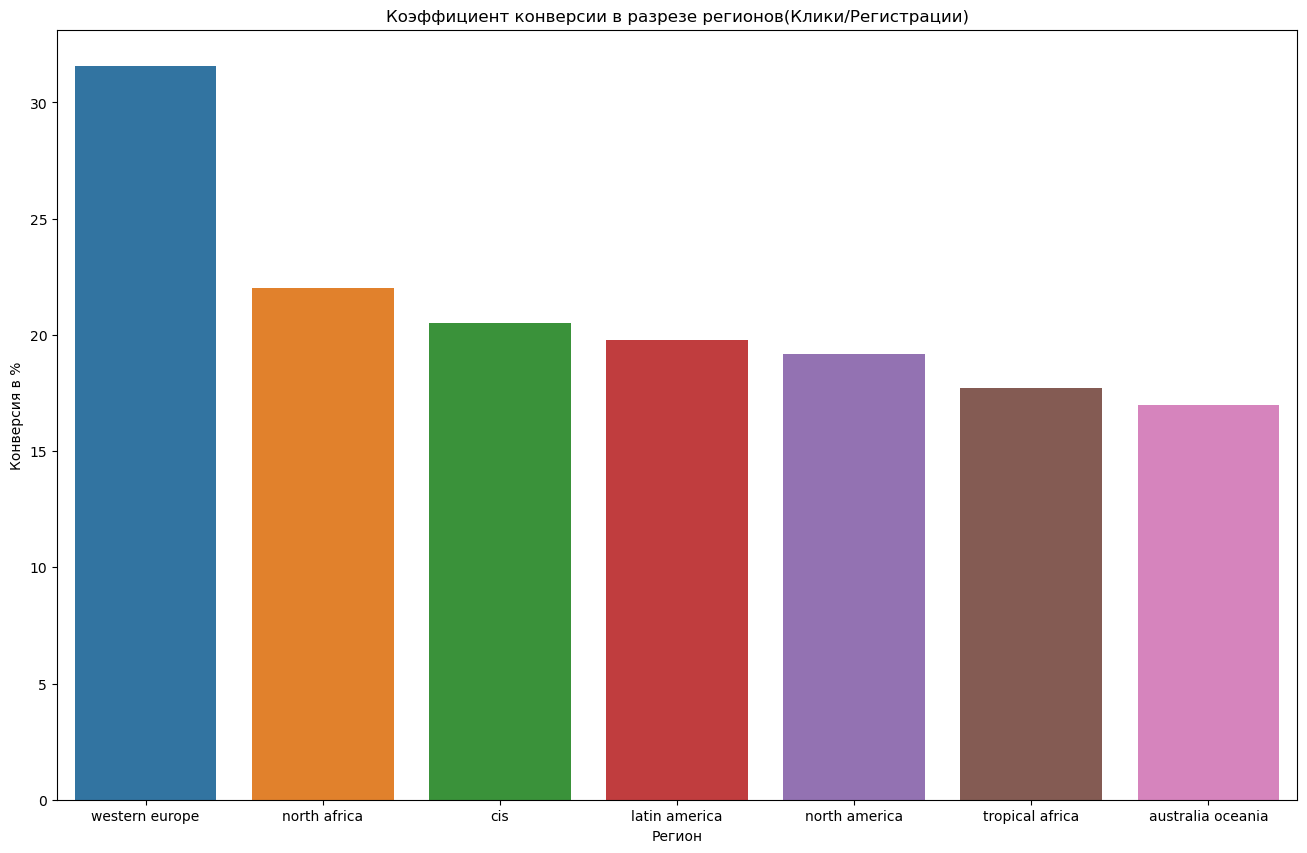

In [21]:
plt.figure(figsize=(16, 10))
sns.barplot(x='Geo',y='CR', data=pivot_fin.sort_values('CR', ascending = False))
plt.xlabel('Регион')
plt.ylabel('Конверсия в %')
plt.title('Коэффициент конверсии в разрезе регионов(Клики/Регистрации)')
plt.show()

* Лучшая конверсия(Клики/Регистрации) в регионе western europe - 31.55%, а в australia oceania самая низкая - 16.98%. Средняя конверсия 21.1%, регионы в которых она выше, можно инвестировать больше средств - это принесет больше пользователей приложения.

Посмотрим на окупаемость компаний по каждому региону в отдельности, для этого сделаем сводную таблицу

In [22]:
data_group = data.groupby('Geo').agg({'Spend':'sum','Revenue_ad1d':'sum','Revenue_ad7d':'sum','Revenue_ad30d':'sum',\
                                    'Revenue_in_app1d':'sum','Revenue_in_app7d':'sum','Revenue_in_app30d':'sum'})
data_group['profit_1d'] = data_group['Revenue_ad1d'] + data_group['Revenue_in_app1d']
data_group['profit_7d'] = data_group['Revenue_ad7d'] + data_group['Revenue_in_app7d']
data_group['profit_30d'] = data_group['Revenue_ad30d'] + data_group['Revenue_in_app30d']
display(data_group)
data_group = data_group[['Spend','profit_1d','profit_7d','profit_30d']]

,Spend,Revenue_ad1d,Revenue_ad7d,Revenue_ad30d,Revenue_in_app1d,Revenue_in_app7d,Revenue_in_app30d,profit_1d,profit_7d,profit_30d
Geo,,,,,,,,,,
australia oceania,21.549999,1.187304,1.212664,1.212664,0.000000,0.000000,0.000000,1.187304,1.212664,1.212664
cis,1192.460001,349.701238,479.703169,575.662277,22.890000,36.710000,55.310000,372.591238,516.413169,630.972277
latin america,356.529999,88.902061,111.822346,123.163132,6.680000,8.220000,16.880000,95.582061,120.042346,140.043132
north africa,247.889999,20.412846,24.468020,27.086440,0.000000,0.000000,0.000000,20.412846,24.468020,27.086440
north america,14045.270010,6031.536440,8114.138994,9939.410108,438.380000,597.990001,842.400003,6469.916440,8712.128995,10781.810111
tropical africa,41.510000,5.473794,6.159881,6.451855,0.000000,0.000000,0.000000,5.473794,6.159881,6.451855
western europe,2267.219999,1093.933091,1534.090739,1970.929752,24.620001,32.430001,50.550001,1118.553092,1566.520740,2021.479753


<Figure size 2000x2000 with 0 Axes>

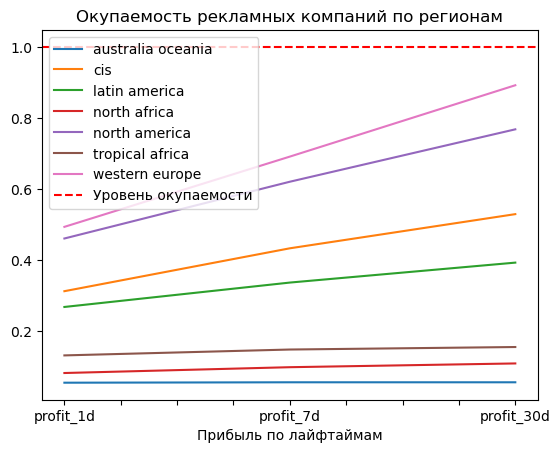

In [23]:
plt.figure(figsize=(20, 20))
data_group.div(data_group['Spend'],axis=0).drop(columns=['Spend']).T.plot()
plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
plt.legend()
plt.xlabel('Прибыль по лайфтаймам')
plt.title('Окупаемость рекламных компаний по регионам')
plt.show()

* Ни в одном из регионов реклама не окупилась. Но очень близки к этому `western europe` `north america`. Хуже всего себя показали компании в регионах: `tropical africa`,`north africa`,`australia oceania`(Именно в данных регионах пользователи не совершили ни одной покупки в приложении).

Посчитаем окупаемость по каждому медиабайеру:

In [24]:
data_group_b = data.groupby('Buyer').agg({'Spend':'sum','Revenue_ad1d':'sum','Revenue_ad7d':'sum','Revenue_ad30d':'sum',\
                                    'Revenue_in_app1d':'sum','Revenue_in_app7d':'sum','Revenue_in_app30d':'sum'})
data_group_b['profit_1d'] = data_group_b['Revenue_ad1d'] + data_group_b['Revenue_in_app1d']
data_group_b['profit_7d'] = data_group_b['Revenue_ad7d'] + data_group_b['Revenue_in_app7d']
data_group_b['profit_30d'] = data_group_b['Revenue_ad30d'] + data_group_b['Revenue_in_app30d']
display(data_group_b)
data_group_b = data_group_b[['Spend','profit_1d','profit_7d','profit_30d']]

,Spend,Revenue_ad1d,Revenue_ad7d,Revenue_ad30d,Revenue_in_app1d,Revenue_in_app7d,Revenue_in_app30d,profit_1d,profit_7d,profit_30d
Buyer,,,,,,,,,,
buyer_1,7211.150000,2689.881901,3343.217090,3874.967751,226.280001,295.899998,413.729999,2916.161902,3639.117088,4288.697750
buyer_2,7225.449996,3269.035834,4584.963333,5624.460621,144.580000,228.420002,359.940003,3413.615834,4813.383335,5984.400624
buyer_3,1953.720009,1017.940341,1477.170391,2046.718896,72.610000,100.550001,111.750001,1090.550341,1577.720392,2158.468897
buyer_4,1141.070006,485.825644,676.328329,886.613370,46.000000,47.380001,75.930001,531.825644,723.708330,962.543371
buyer_5,641.039996,128.463054,189.916670,211.155590,3.100000,3.100000,3.790000,131.563054,193.016670,214.945590


<Figure size 2000x2000 with 0 Axes>

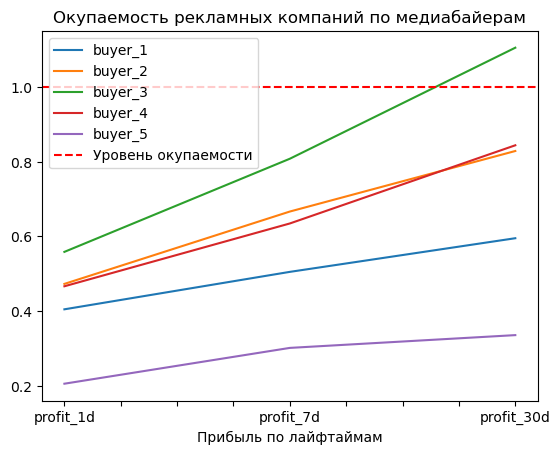

In [25]:
plt.figure(figsize=(20, 20))
data_group_b.div(data_group_b['Spend'],axis=0).drop(columns=['Spend']).T.plot()
plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
plt.legend()
plt.xlabel('Прибыль по лайфтаймам')
plt.title('Окупаемость рекламных компаний по медиабайерам')
plt.show()

* Лучше всего окупается `buyer_3` - он единственный вышел в плюс по прибыли для компании на 30 лайфтайм для привлеченных пользователей. Хуже всего обстоят дела у `buyer_5`.

Выделим 10 рекламных компаний с самыми "не дорогими" клиентами:

In [26]:
data['cac'] = data['Spend']/data['Registrations']
display(data.sort_values('cac').head(10))
data.sort_values('cac').head(10)['Campaign_id'].unique()

,Campaign_id,Geo,Buyer,Impressions,Clicks,Installs,Registrations,Spend,Revenue_ad1d,Revenue_in_app1d,Payers1d,Revenue_ad7d,Revenue_in_app7d,Payers7d,Revenue_ad30d,Revenue_in_app30d,Payers30d,cac
20,21,north africa,buyer_5,794504,28598,8069,6218,204.389999,16.596565,0.000000,0,19.425793,0.000000,0,21.596790,0.000000,0,0.032871
55,56,north africa,buyer_5,154149,3526,1591,851,43.500000,3.816281,0.000000,0,5.042227,0.000000,0,5.489650,0.000000,0,0.051116
44,45,latin america,buyer_1,113452,6161,1969,1195,69.079998,26.508120,0.490000,1,33.237345,0.490000,1,36.143677,0.490000,1,0.057808
26,27,latin america,buyer_1,295356,8540,3133,1880,143.820002,45.503129,3.160000,3,56.555716,3.160000,3,61.435260,4.460000,3,0.076500
23,24,north america,buyer_1,201923,16025,2836,1944,156.430002,92.957284,11.290000,4,117.630269,12.400000,5,129.256093,20.039999,5,0.080468
59,60,tropical africa,buyer_1,90894,2735,778,485,41.510000,5.473794,0.000000,0,6.159881,0.000000,0,6.451855,0.000000,0,0.085588
68,69,north america,buyer_4,41822,734,326,248,24.629999,17.929136,0.540000,1,20.033737,0.540000,1,20.319256,8.440000,2,0.099315
40,41,north america,buyer_2,100570,3246,1610,714,82.389999,37.550579,1.280000,1,43.248873,1.840000,1,46.849836,3.130000,1,0.115392
86,87,north america,buyer_2,16622,547,258,142,20.410000,10.137634,0.000000,0,11.395477,0.000000,0,12.398617,0.000000,0,0.143732
0,1,north america,buyer_1,3456974,129508,33054,21932,3208.440002,1163.521408,162.220001,64,1381.310062,199.749999,79,1527.013835,276.629998,83,0.146290


array([21, 56, 45, 27, 24, 60, 69, 41, 87,  1], dtype=int64)

* Самые "не дорогие клиенты" были в компаниях: 21, 56, 45, 27, 24, 60, 69, 41, 87, 1.

Посчитаем какая средняя "стоимость клиента" в каждом конкретном регионе:

In [27]:
cac_grouped = data.groupby('Geo').agg({'cac':'mean'}).sort_values('cac', ascending = False)
cac_grouped

,cac
Geo,
australia oceania,2.394444
north america,1.047913
western europe,0.877818
cis,0.630312
latin america,0.155595
tropical africa,0.085588
north africa,0.041994


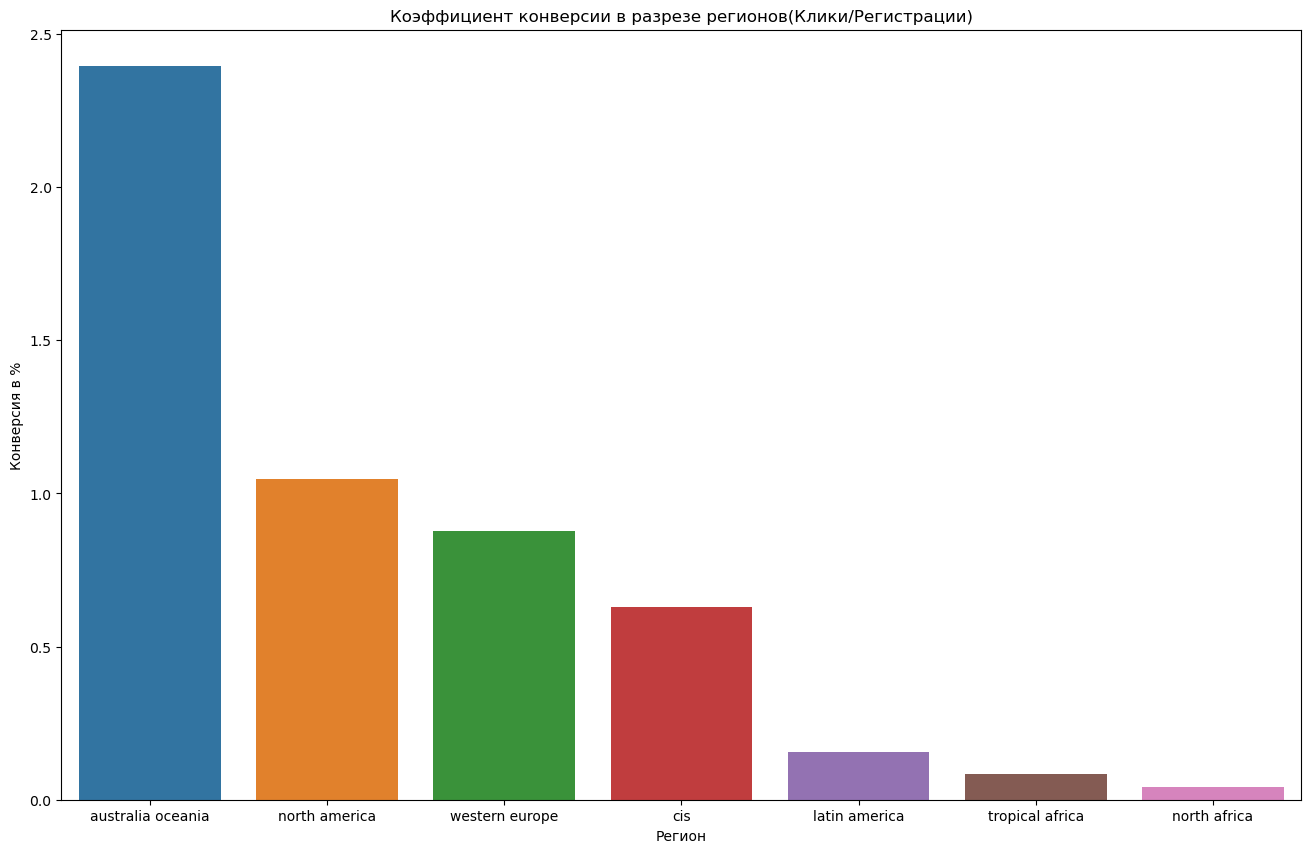

In [28]:
plt.figure(figsize=(16, 10))
sns.barplot(x=cac_grouped.index,y='cac', data=cac_grouped)
plt.xlabel('Регион')
plt.ylabel('Конверсия в %')
plt.title('Коэффициент конверсии в разрезе регионов(Клики/Регистрации)')
plt.show()

* Самые дорогие клиенты были в регионе australia oceania.

Посмотрим какие компании оказались не убыточными на 30 день жизни пользователя:

In [29]:
data['profit'] = (data['Revenue_ad30d']+data['Revenue_in_app30d'])-data['Spend']
data_profit = data.loc[data['profit']>=0]
data_profit

,Campaign_id,Geo,Buyer,Impressions,Clicks,Installs,Registrations,Spend,Revenue_ad1d,Revenue_in_app1d,Payers1d,Revenue_ad7d,Revenue_in_app7d,Payers7d,Revenue_ad30d,Revenue_in_app30d,Payers30d,cac,profit
7,8,north america,buyer_3,113917,3966,1249,854,521.509998,306.853212,30.78,2,484.534634,39.170000,3,770.979189,47.560000,4,0.610667,297.029191
12,13,western europe,buyer_2,99721,1594,970,702,384.739998,231.865353,0.73,1,340.080940,5.480000,3,460.489636,8.760000,3,0.548063,84.509638
24,25,north america,buyer_3,21178,636,239,183,153.510000,113.351948,0.69,1,148.397449,1.380000,2,203.260172,2.810000,4,0.838852,52.560172
29,30,western europe,buyer_2,49131,1449,723,461,137.100000,131.065869,0.00,0,181.802195,0.720000,1,293.140940,0.720000,1,0.297397,156.760940
30,31,north america,buyer_4,27598,880,335,270,136.879999,100.510319,6.26,4,155.663275,6.260000,4,192.697524,9.750000,4,0.506963,65.567525
32,33,north america,buyer_4,21635,475,238,202,116.750000,81.319929,17.47,2,107.925810,18.160001,2,134.986309,26.550001,2,0.577970,44.786310
62,63,north america,buyer_4,8164,118,64,77,29.920000,34.161366,0.00,0,43.789066,0.000000,0,67.051895,0.000000,0,0.388571,37.131895
63,64,north america,buyer_4,5070,215,63,57,28.230000,17.150673,9.77,2,20.167320,10.460000,2,20.453054,10.460000,2,0.495263,2.683054
68,69,north america,buyer_4,41822,734,326,248,24.629999,17.929136,0.54,1,20.033737,0.540000,1,20.319256,8.440000,2,0.099315,4.129257
69,70,western europe,buyer_2,10112,190,90,49,24.290001,13.567551,3.38,1,18.668226,3.380000,1,19.984028,6.710000,1,0.495714,2.404027


* Всего 11 рекламных компаний принесли прибыль нашему приложению. Проводились они в `north america` и `western europe`.

## Вывод:

Мы провели исследование данных по работе рекламных кампаний, запущенных пятью медиабайерами для привлечения пользователей в наше приложение. Такие выводы мы получили:

* По результату всех рекламных компаний, организация к сожалению осталась в минусе по прибыли;
* Лучше всего окупается `buyer_3` - он единственный вышел в плюс по прибыли для компании на 30 лайфтайм для привлеченных пользователей. Хуже всего обстоят дела у `buyer_5`;
* Ни в одном из регионов реклама не окупилась. Но очень близки к этому `western europe` и `north america`. Хуже всего себя показали компании в регионах: `tropical africa, north africa, australia oceania`(Именно в данных регионах пользователи не совершили ни одной покупки в приложении);
* Лучшая конверсия(Клики/Регистрации) в регионе `western europe` - 31.55%, а в `australia oceania` самая низкая - 16.98%. Средняя конверсия 21.1%, регионы в которых она выше, можно инвестировать больше средств - это принесет больше пользователей приложения.
* Лучшая конверсия(Показы/Клики) в регионе `north america` - 3.54%, а в `western europe` самая низкая - 2.14%.
* Всего 11 рекламных компаний принесли прибыль нашему приложению. Проводились они в north america и western europe.

**Рекомендации:**
* Необходимо разобраться по какой причине в регионах `tropical africa, north africa, australia oceania` не было совершенно ни одной покупки по итогам рекламных компаний(Возможно ошибки в приложении и т.п.);
* Следует обратить пристально внимание на регионы `western europe` и `north america`, это те кто будет приносить деньги нашему приложению.